# Question 1:

In [468]:
# 1.1: Load data (Successful)

# Import pandas to read data
import pandas as pd

# Read the data using pd.read_csv() with relative path, keep high precision
df=pd.read_csv("./input_data.csv", header=None, float_precision='round_trip')

# row is 2207, col is 459
print(df.shape) # returned (2207, 459)

(2207, 459)


In [469]:
# 1.1 Continue (data wrangling)

print(df.isna().values.sum()) # returned 0, meaning no missing data

# Handling constant rows
constant_df=df[df.nunique(axis=1)==1]
df.drop(constant_df.index, inplace=True)
print(df.shape) # return (1806, 459)


# Transpose it such that every row is the vector, with columns corresponding to entries in the vector.
std_df=df.T
print(std_df.shape) # returned (459, 1806), transpose is successful

# Perform range standardization through elementwise functions (y_ij): (reuse my own code for asignment 3)
# use for loop to, where i is the column, j is values at new_df[col]
# using skelearn.preprocessing.StandardScaler also works

for col in std_df.columns:
    std_df[col]=(std_df[col]-std_df[col].min())/(std_df[col].max()-std_df[col].min())

# print("The range standardized features y_ij are:\n")
# print(std_df)



0
(1806, 459)
(459, 1806)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

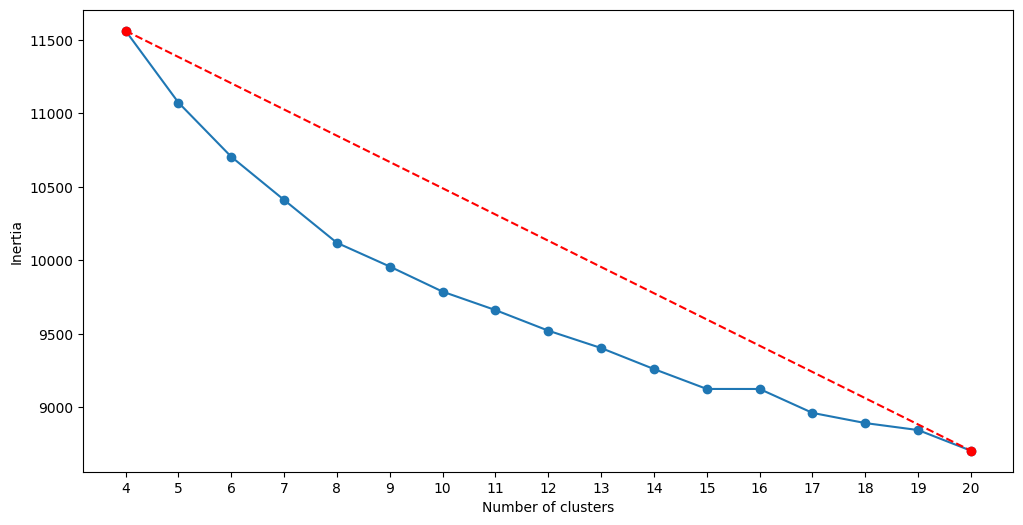

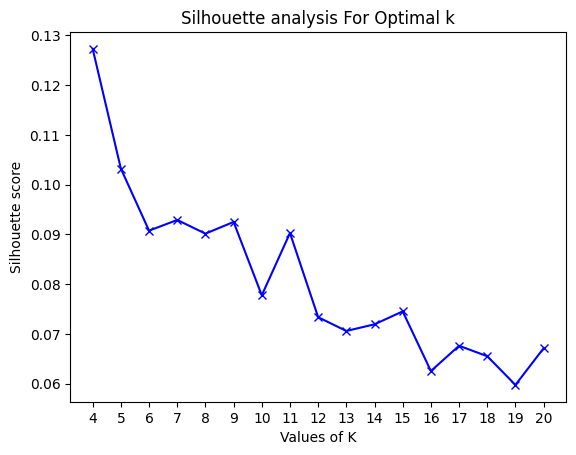

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



The score for 4-means clustering on regular data is:
-11563.545422484363

The inertria for 4-means clustering on regular data is:
11563.545422484362

The labels for 4-means clustering on regular data is:
[2 2 2 2 2 0 0 2 0 3 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 1 1 1 2 2 2 2 3 1 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 1 1 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3
 1 1 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 3 1 3 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 0 1 2 2 0 2 1 2 2 1
 2 0 2 0 2 2 2 0 0 0 0 2 0 2 2 0 2 1 3 1 3 3 3 3 3 3 1 1 1 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 3 2 2 1 2 2 2 1 1 1
 1 1 1 1 1 3 1 1 1 1 2 1 2 2 2 3 1 1 1 1 2 1 

In [577]:
# 1.2: Perform K-means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# EXTRA: determine how to do get the best # cluster using elbow and Silhoutette

# Finding optimal number of clusters
range_clusters=np.arange(4,21)

# use for loop to  run different K-means model with different numbers of cluster, find the inertia and silhouette coefficient
# Inertia is the sum of distances of samples to their cloeses cluster center
# Silhouette coefficient silhouette score: measures of how similar a data point is within cluster compared to other clusters)
SSE_list=[]
silhouette_avg = []

for num_cluster in range_clusters:
    kmeans = KMeans(n_clusters = num_cluster, init='k-means++')
    kmeans.fit(std_df)
    # Append the metrics to lists
    SSE_list.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(std_df, kmeans.labels_))

# Finding the inertia that has the longest distance from the line drawn from the first point to the last point
frame = pd.DataFrame({'Cluster':range_clusters, 'SSE':SSE_list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(range_clusters)
plt.ylabel('Inertia')
plt.plot([4,20], [SSE_list[0], SSE_list[-1]], 'bo',linestyle="--", color='red')
plt.show()
# Interpretation is 4, confirm with silhouette analysis

# Silhoutette Analysis
plt.plot(range_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range_clusters)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Since 4 has the maximum silhouette score, the optimal k of 4 is verified

# Perform K-means clustering (actually)
kmeans=KMeans(n_clusters=4, init="k-means++")
# fit the k-means model (fit OR fit_predict)
kmeans.fit_predict(std_df)

# Get the score
print("\nThe score for 4-means clustering on regular data is:")
print(kmeans.score(std_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on regular data is:")
print(kmeans.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on regular data is:")
print(kmeans.labels_) # returned an array that shows which cluster each observation is in


In [471]:
# 1.3 generate a n(459)*n(459) matrix, denoted M

# each entry m_ij is 1 if observations i and j are in the same cluster and 0 if they are in different clusters.


# WAY 1
# if  i and j are same cluster--> 1 else 0
M=np.zeros((std_df.shape[0], std_df.shape[0]))
print(M.shape) # returned (459, 459)

print(kmeans.labels_)
print(kmeans.labels_[1])

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if kmeans.labels_[i]==kmeans.labels_[j]:
            M[i][j]=1

print(M)

"""
# WAY 2
# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels
for i in range(459):
    if i==0:
        m=kmeans.labels_
    else:
        m=np.vstack((m, kmeans.labels_))

print(m.shape)

# Unsure (NEED CHECK)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if m[i][j]==m[j][i]:
            M[i][j]=1

print(M)
"""


(459, 459)
[3 3 3 3 3 1 1 3 1 0 3 3 3 3 2 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 2 2 2 3 3 3 3 0 2 0 0 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 3 3 3 2 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 2 2 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0
 2 2 2 2 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 3 1 2 3 3 1 3 2 3 3 2
 3 1 3 1 3 3 3 1 1 1 1 3 1 3 3 1 3 2 0 2 0 0 0 0 0 0 2 2 2 3 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 0 3 3 2 3 3 3 2 2 2
 2 2 2 2 2 0 2 2 2 2 3 2 3 3 3 0 2 2 2 2 3 2 3 3 3 2 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
3
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

"\n# WAY 2\n# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels\nfor i in range(459):\n    if i==0:\n        m=kmeans.labels_\n    else:\n        m=np.vstack((m, kmeans.labels_))\n\nprint(m.shape)\n\n# Unsure (NEED CHECK)\nfor i in range(M.shape[0]):\n    for j in range(M.shape[1]):\n        if m[i][j]==m[j][i]:\n            M[i][j]=1\n\nprint(M)\n"

In [472]:
# 1.4 PCA

# import PCA from sklearn library in python
from sklearn.decomposition import PCA

print(std_df.shape) # 459*1806

# for loop (TEST)
# for i in range(std_df.shape[0]):
#     pca=PCA(n_components=3)
#     pca_fit=pca.fit(std_df[i])

#     print(pca_fit.components_)
#     print(pca_fit.n_features_)  

pca=PCA(n_components=3) # with n_components=3
# DO fit transform on PCA
reduced_df=pca.fit_transform(std_df)

print(reduced_df)
print(reduced_df.shape) # returned (459, 3) (Successful)


(459, 1806)
[[ 4.74552794e-01  1.01833593e-03 -6.31156968e-01]
 [ 9.52198171e-01  1.16564674e+00  4.15443131e-01]
 [ 5.98436117e-01  9.29725588e-01  3.14532944e-02]
 ...
 [-2.34711288e+00 -2.85385396e+00  7.63935699e-01]
 [-1.34202340e+00 -3.44538238e+00 -2.12428548e+00]
 [-1.03579551e+00 -3.55412625e+00 -1.76828319e+00]]
(459, 3)


In [473]:
# 1.5 Do k-means clustering on the resulting reduced-dimensional data

# Perform K-means clustering (actually)
kmeans_reduce=KMeans(n_clusters=4)
# fit the k-means model (fit or fit_predict)
reduced=kmeans_reduce.fit(reduced_df)

# Get the score
print("\nThe score for 4-means clustering on reduced-dimensional data is:")
print(reduced.score(reduced_df)) # returned -2250.2534290496333

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on reduced-dimensional data is:")
print(reduced.inertia_) # returned 2250.2534290496333

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on reduced-dimensional data is:")
print(reduced.labels_) # returned an array that shows which cluster each observation is in

print(reduced.labels_.shape) # returned (459,1), just like before


The score for 4-means clustering on reduced-dimensional data is:
-2250.224461469954

The inertria for 4-means clustering on reduced-dimensional data is:
2250.2244614699534

The labels for 4-means clustering on reduced-dimensional data is:
[0 0 0 3 0 3 3 0 3 2 0 0 0 0 0 0 0 0 3 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 0 0
 0 2 0 0 0 0 0 0 0 2 1 2 2 0 0 3 3 0 0 0 3 3 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 1 3 3 3 0 1 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2
 0 1 1 1 0 0 1 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 3 3 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3 2 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 0 3 3 0 1 0 0 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 2 2 2 1 1 1 0 1 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 1 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 1
 1 1 1 1 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [474]:
# 1.6 Create another n × n matrix P (but using the reduced-dimensional data)

# if  i and j are same cluster--> 1 else 0
P=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))
print(P.shape) # returned (459, 459)


# WAY 1
print(kmeans_reduce.labels_)
print(kmeans_reduce.labels_[1])

for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if kmeans_reduce.labels_[i]==kmeans_reduce.labels_[j]:
            P[i][j]=1.0

print(P)

"""
# Way 2
# Use for loop and np.vstack to build a n*n matrix for m that stores the observations' labels
for i in range(459):
    if i==0:
        p=kmeans_reduce.labels_
    else:
        p=np.vstack((p, kmeans_reduce.labels_))

# print(m.shape)

# Unsure (NEED CHECK)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if p[i][j]==p[j][i]:
            P[i][j]=1

print(P)
"""

print(P.shape)

(459, 459)
[0 0 0 3 0 3 3 0 3 2 0 0 0 0 0 0 0 0 3 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 0 0
 0 2 0 0 0 0 0 0 0 2 1 2 2 0 0 3 3 0 0 0 3 3 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 1 3 3 3 0 1 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2
 0 1 1 1 0 0 1 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 3 3 0 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3 2 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 0 3 3 0 1 0 0 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 2 2 2 1 1 1 0 1 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 1 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 2 1 1 1 1 0 1 0 0 0 2 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

In [475]:
# 1.7 Code to answer the questions

# Compare M and P

print("The number of entries that M and P share together are: "+str(np.sum(M == P)))
print("The total elements that M and P each has: "+ str(M.shape[0]*M.shape[0]))

print("The probability of elements that are shared among in M and P is: "+str(np.sum(M == P))+"/"+str(M.shape[0]*M.shape[0])+"="+str(np.sum(M == P)/(M.shape[0]*M.shape[0])))
print("The percentage of elements that are shared among in M and P is: "+ str(np.sum(M == P)/(M.shape[0]*M.shape[0])*100)+ "%")

The number of entries that M and P share together are: 189339
The total elements that M and P each has: 210681
The probability of elements that are shared among in M and P is: 189339/210681=0.8986999302262663
The percentage of elements that are shared among in M and P is: 89.86999302262663%


# 1.7 Answers (First draft)

* Q1: How many entries are the same between M and P? 
* A: 190755 entries are the same between M and P. Since there are a total of 210681 entries in M & P. The percentage of elements that are shared among in M and P is 0.9010257213512372 or 90.10257213512372%

* Q2: In other words, how did performing PCA affect the structure of the data? 
* A: PCA reduce the dimensionality of the standardized dataset, from 459 * 459 to 459 * 3 to prevent the curse of dimensionality, which make data sparse as dimensionality increases

# Question 2

In [578]:
# 2.1 Perform k-means on the full-dimensional data ten times

inertia_list=[]
M_list=[]

# 10 times using a for loop
for i in range(10):
    # using k clusters each time but ten different sets of initial values for cluster centroids
    kmeans_loop=KMeans(n_clusters=4, init="k-means++")
    # fit the k-means model (fit or fit_predict)
    kmeans_10=kmeans_loop.fit(std_df)

    # Appending values to 2d Matrix that holds all M1 to M10, denoted m_loop using vstack()
    # if i==0:
    #     m_loop=kmeans_10.labels_
    # else:
    #     m_loop=np.vstack((m_loop, kmeans_10.labels_))

    inertia_list.append(kmeans_10.inertia_)

    # Generate matrices M1, . . . , M10 indicating whether given pairs of observations are in the same cluster,
    item=np.zeros((std_df.shape[0], std_df.shape[0]))

    for i in range(std_df.shape[0]):
        for j in range(std_df.shape[0]):
            if kmeans_10.labels_[i]==kmeans_10.labels_[j]:
                item[i][j]=1.0

    M_list.append(item)

print(inertia_list) # ranges around 11560-11570

# print(test)
# print(M_list) # (10, 459), 10 M each with 459 lables --> SUCCESS


"""
# init the 10 matrices first
M1=M2=M3=M4=M5=M6=M7=M8=M9=M10=np.zeros((std_df.shape[0], std_df.shape[0]))

M_list=[M1, M2, M3, M4, M5, M6, M7, M8, M9, M10]

# Indidvial case (PROTOTYPE)
# for i in range(M1.shape[0]):
#     for j in range(M1.shape[1]):
#         if m_loop[0][i]==m_loop[0][j]:
#             M1[i][j]=1.0
# for i in range(M2.shape[0]):
#     for j in range(M2.shape[1]):
#         if m_loop[1][i]==m_loop[1][j]:
#             M2[i][j]=1.0

# Group Case (should work)
temp=0
for item in M_list:
    print(temp)
    # if temp<9:
    #     print(sum(m_loop[temp]!=m_loop[temp+1]))
    # print()
        
    for i in range(std_df.shape[0]):
        for j in range(std_df.shape[0]):
            if m_loop[temp][i]==m_loop[temp][j]:
                item[i][j]=1.0
    temp+=1

# CHECK 
"""


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

[11563.100351349738, 11563.507590101714, 11563.100351349734, 11563.391764308437, 11563.100351349734, 11563.545422484362, 11563.100351349736, 11563.545422484362, 11563.545422484362, 11563.802139044365]


'\n# init the 10 matrices first\nM1=M2=M3=M4=M5=M6=M7=M8=M9=M10=np.zeros((std_df.shape[0], std_df.shape[0]))\n\nM_list=[M1, M2, M3, M4, M5, M6, M7, M8, M9, M10]\n\n# Indidvial case (PROTOTYPE)\n# for i in range(M1.shape[0]):\n#     for j in range(M1.shape[1]):\n#         if m_loop[0][i]==m_loop[0][j]:\n#             M1[i][j]=1.0\n# for i in range(M2.shape[0]):\n#     for j in range(M2.shape[1]):\n#         if m_loop[1][i]==m_loop[1][j]:\n#             M2[i][j]=1.0\n\n# Group Case (should work)\ntemp=0\nfor item in M_list:\n    print(temp)\n    # if temp<9:\n    #     print(sum(m_loop[temp]!=m_loop[temp+1]))\n    # print()\n        \n    for i in range(std_df.shape[0]):\n        for j in range(std_df.shape[0]):\n            if m_loop[temp][i]==m_loop[temp][j]:\n                item[i][j]=1.0\n    temp+=1\n\n# CHECK \n'

In [477]:
# 2.2 Answer qustions 

# Check robustness
percentages=[]
# Compare M1 to M10 with M using for loop
for i in M_list:
    percentages.append(np.sum(i==M)/(std_df.shape[0]*std_df.shape[0]))


# M_list has the shape 10*459*459

# find the indices that appears in at least one of the 10 matrices
counter_any=0
for i in range(M_list[0].shape[0]):
    for j in range(M_list[0].shape[1]):
        found=False
        for k in range(len(M_list)):
            if M_list[k][i,j]==1:
                found=True
                break # for faster output
        if found:
            counter_any+=1

print(counter_any)

# find the indices that appears in all 10 matrices
counter_all=0
for i in range(M_list[0].shape[0]):
    for j in range(M_list[0].shape[1]):
        found=True
        for k in range(len(M_list)):
            if not M_list[k][i,j]==1:
                found=False
                break # for faster output
        if found:
            counter_all+=1
print(counter_all)

percent_all_runs=counter_all/counter_any*100

# divide counter_all by counter_any to determine the ratio/ percentage of same cluster in all 10 runs out of same cluster in at least 1 run
print("\nThe percentage were in the same cluster in all ten runs compared to the same cluster in at least one run is: ")
print(str(counter_all)+"/"+str(counter_any)+"="+str(percent_all_runs)+"%")

    

67205
53189

The percentage were in the same cluster in all ten runs compared to the same cluster in at least one run is: 
53189/67205=79.14440889814746%


# Answers to Q2 (Update)

* Q1: Determine whether the results of k-means on this dataset robust to the initial cluster centroid values chosen
* A: 
  * It is not robust enough because the inertia calculated at each time when fitting K-means to the full dimensional data is in the range [11560,11570].
  * Since the inertia obtained when doing K-means clustering with 1 iteration is 11566, there is not a significant difference between them. 
  * Thus it’s not robust enough for the K-means result with initial cluster centroid values chosen.

  # OR
  * It is robust enough because when M1 to M10 is each compared with M which is the matrix generated when initial cluster values are chosen, their similarities are all above 97% meaning they produce very similar labels preductions.

<br><br>
* Q2: Out of all of the pairs of observations that were recorded to be in the same cluster in at least one run, what percentage were in the same cluster in all ten?
* A:
  * Based on the previous code cell's latest output, it is 91.97246639691177%.


# Question 3

In [501]:
# 3.1 Implement single-linkage clustering algorithm, then use it to perform clustering on reduced-dimensional data

# import the required modules to do single-linkage clustering
import scipy.cluster.hierarchy as shc
# Use scipy.spatial.distance to get pairwise difference (pdist), squareform(convert vector matrix to square matrix)
from scipy.spatial.distance import squareform, pdist

from sklearn.cluster import AgglomerativeClustering


# Plot Dendrogram
# plt.figure(figsize=(10,10))
# plt.title('Title')
# Dendrogram=shc.dendrogram((shc.linkage(reduced_df, method='single', metric='euclidean')))

ac=AgglomerativeClustering(n_clusters=4, linkage='single', affinity='euclidean').fit(reduced_df)

# print(ac.labels_.shape) # returned 459*1


# 3.2 create a matrix S for the result in the same way that you did M and P
S=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))

for i in range(reduced_df.shape[0]):
    for j in range(reduced_df.shape[0]):
        if ac.labels_[i]==ac.labels_[j]:
            S[i][j]=1.0

# Codebase for 3.3 (answering how many entires S has in common with P
print("The number of entries that S and P share together are: "+str(np.sum(S == P)))
print("The total elements that M and P each has: "+ str(S.shape[0]*S.shape[0]))

print("The probability of elements that are shared among in M and P is: "+str(np.sum(S == P))+"/"+str(S.shape[0]*S.shape[0])+"="+str(np.sum(S == P)/(S.shape[0]*S.shape[0])))
print("The percentage of elements that are shared among in M and P is: "+ str(np.sum(S == P)/(S.shape[0]*S.shape[0])*100)+ "%")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The number of entries that S and P share together are: 58229
The total elements that M and P each has: 210681
The probability of elements that are shared among in M and P is: 58229/210681=0.2763846763590452
The percentage of elements that are shared among in M and P is: 27.63846763590452%
(459, 459)


# Answers to question 3.3

* Q: How many entries S has in common with P?
* A: 172355 entries S has in common with P.

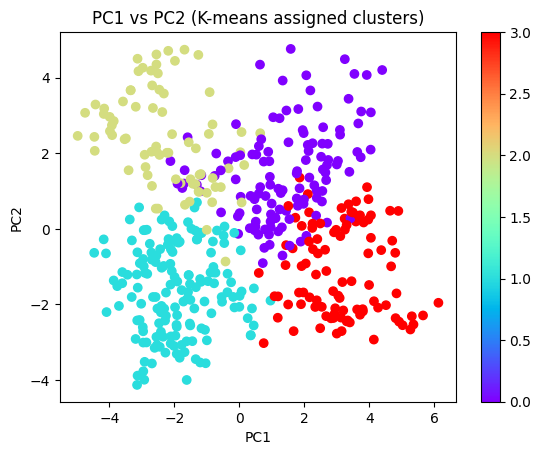

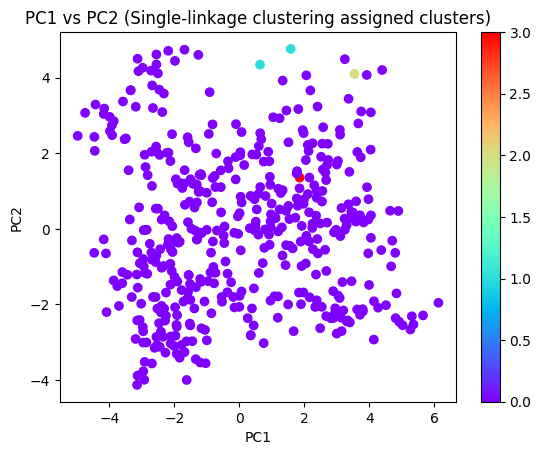

<Figure size 640x480 with 0 Axes>

In [498]:
# 3.4 Create two scatterplots of the observations in the reduced-dimensional dataset, 
# each with the first two principal components on the axes.

# Similar to what I did for my assignment 3

# plot the first one
 
 
# reduced_df[:,0]
plt.scatter(reduced_df[:,0],reduced_df[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (K-means assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

plt.scatter(reduced_df[:,0],reduced_df[:,1], c=ac.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (Single-linkage clustering assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()
plt.tight_layout()

# Answers for 3.4
* Q: What kinds of cluster shapes do k-means and single-linkage clustering tend to produce? 
<br><br>
* A: From the scatterplots above, we can see that k-means clustering tends to produce spherical and convex clusters and the clusters have similar sizes. It is because k means clustering assigns all vectors to a cluster based on which cluster mean they are closest to. As long as the cluster means are not too close to each other, clusters from K means clustering are likely to appear as partitioned disjointly in scatterplots.
On the other hand,  single-linkage clustering tends to produce clusters with irregular shape, especially long thin clusters. It is because the single-linkage clustering algorithm solely groups nearby clusters together based on the euclidean distance of 2 observations. It ignores the shape of clusters. Hence clusters produced from single-linkage clustering tend to be irregular.


# Question 4 Code and Answers:

In [530]:
# 4.1 Use expectation-maximization(EM) algorithm with k clusters to probabilistically assign observations in the reduced-dimensional data to distributions/clusters.

# Import the required modules to implement EM
from sklearn.mixture import GaussianMixture

# Testing with fit
gm=GaussianMixture(n_components=4, init_params='k-means++').fit(reduced_df)
# print(gm.means_) # returned the weights of each mixture components

# Then predicr
gm_predict=gm.predict(reduced_df)
# print(gm_predict) # returned proper results with clusters asgined


# 4.2  Generate a new matrix 
# Create a new matrix E whose entries eij take values in [0, 1]: 
# for observations i and j, eij is the probability that i and j are in the same cluster.

# Prototype
gm_predict_prob=gm.predict_proba(reduced_df)
# print(gm_predict_proba)
# print(gm_predict_proba.shape[1])

E=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))

for i in range(reduced_df.shape[0]):
    for j in range(reduced_df.shape[0]):
        # check whether i and j are in the same cluster: add the probabiltiies they are in clusters 0, 1, 2, 3
        temp_prob=0
        # sum the prob
        for k in range(gm_predict_prob.shape[1]):
            temp_prob+=(gm_predict_prob[i][k] * gm_predict_prob[j][k])
        # if gm_predict[i]==gm_predict[j]:
            # E[i][j]=gm_predict_proba[i][j]
        E[i][j]=temp_prob
# print(E)
# print(E.shape)

# Code to answer the question below:

# Count all the sums that are greater than 1% AND at least in 2 different clusters
total_samples=np.sum(np.sum(gm_predict_prob>0.01, axis=1)>1)
print("The total number of observations have at least two different clusters that they are assigned to with probability greater than 1%"+"are: \n",total_samples)

print("The percentage of observations have at least two different clusters that they are assigned to with probability greater than 1%"+"are: \n"+str(total_samples/reduced_df.shape[0]*100)+"%")

The total number of observations have at least two different clusters that they are assigned to with probability greater than 1%are: 
 227
The percentage of observations have at least two different clusters that they are assigned to with probability greater than 1%are: 
49.45533769063181%


# Answer to question 4:

* Q: What percentage of observations have at least two different clusters that they are assigned to with probability > 1%?
<br><br>
* A: The percentage of observations have at least two different clusters that they are assigned to with probability > 1% is 77.5599128540305%

# Question 5

(459, 3)


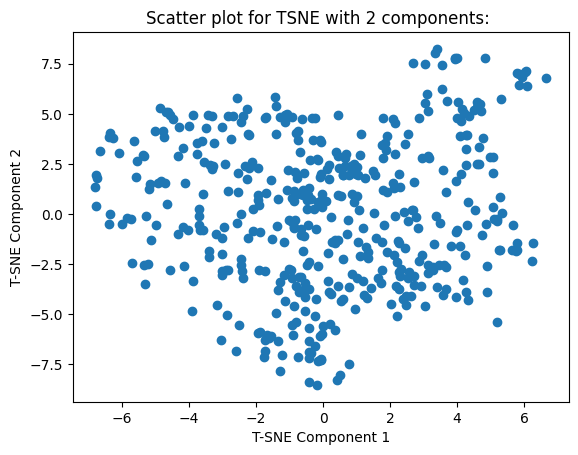

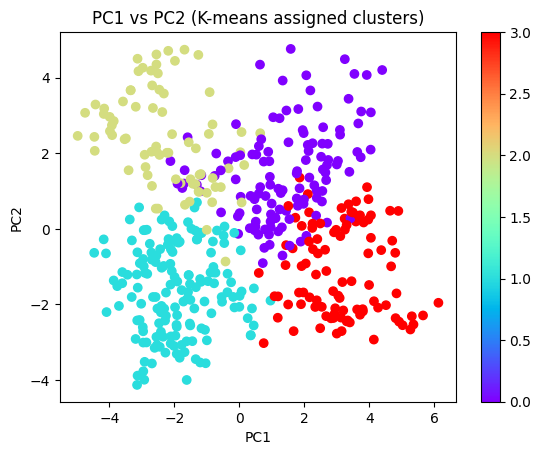

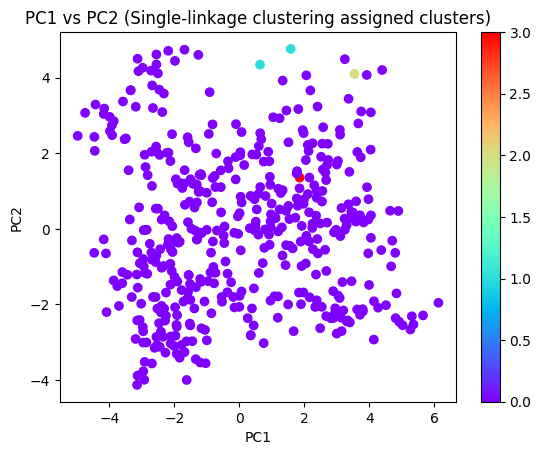

<Figure size 640x480 with 0 Axes>

In [542]:
# 5.1 Run t-SNE on the full-dimensional dataset (not the reduced dimensional one) with tuning parameters of your choice. 

# Import the required modules
from sklearn.manifold import TSNE

default_TSNE=TSNE().fit_transform(std_df)

print(default_TSNE.shape) # returned (459,2)

# plot it
plt.scatter(default_TSNE[:,0],default_TSNE[:,1])
plt.title("Scatter plot for TSNE with 2 components: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
# plt.colorbar()
plt.show()
plt.tight_layout()

# plot the plots again from question 3
plt.scatter(reduced_df[:,0],reduced_df[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (K-means assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

plt.scatter(reduced_df[:,0],reduced_df[:,1], c=ac.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (Single-linkage clustering assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()
plt.tight_layout()




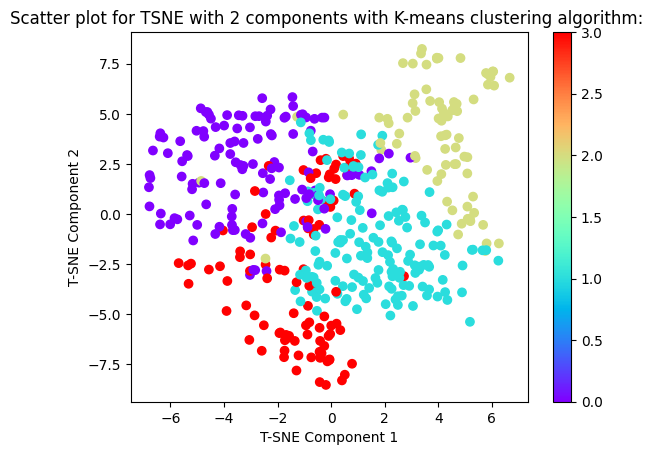

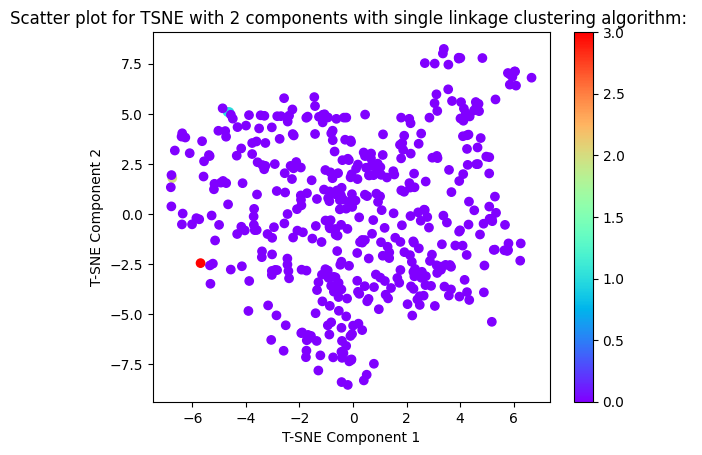

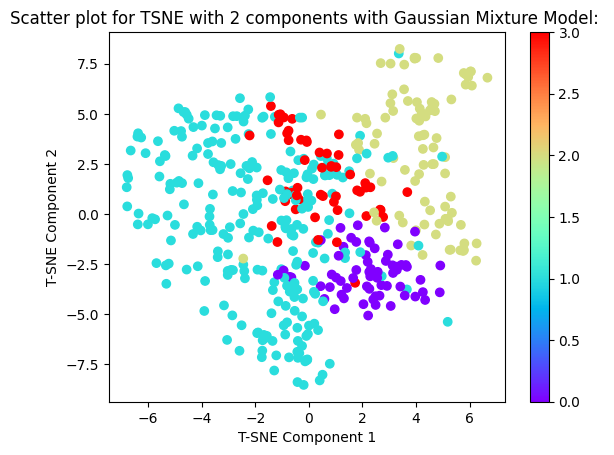

<Figure size 640x480 with 0 Axes>

In [548]:
# plot it
plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with K-means clustering algorithm: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()

plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=ac.labels_, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with single linkage clustering algorithm: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()

plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=gm_predict, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with Gaussian Mixture Model: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()


# Answering question 5:

* Q1: How similar does the plot look to the ones that you generated in part c?

<br><br>

* A: The percentage of observations have at least two different clusters that they are assigned to with probability > 1% is 77.5599128540305%

* Q2: Do the observations that are located in the same part of the t-SNE plot also tend to cluster together when other algorithms are used? 

<br><br>

* A: The percentage of observations have at least two different clusters that they are assigned to with probability > 1% is 77.5599128540305%

# Extra Part:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4

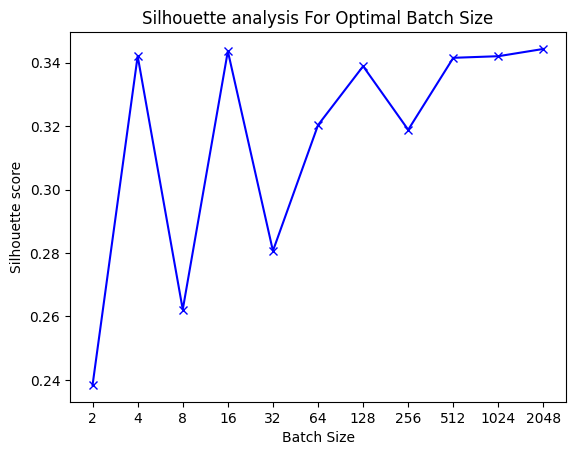

The optimal batch size is:  2048

The score for mini-batch 4-means clustering on regular data is:
-2283.8615740646405

The inertria for mini-batch 4-means clustering on regular data is:
2283.8615740646405

The labels for mini-batch 4-means clustering on regular data is:
[2 1 1 2 1 2 2 1 2 3 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1
 1 3 1 1 1 1 1 1 1 3 0 3 3 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 1 0 3 1 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3
 1 0 0 0 1 1 0 2 2 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 2 3 0 3 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 0 1 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 3 3 3 3 3 0 0 0 2 0 1 1 1 1 1 2
 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 0 3 3 1 1 1 1 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [580]:
# Connectivity-based Clustering (Hierarchical Clustering) on the original data

# Mini-Batch K-means

from sklearn.cluster import MiniBatchKMeans

# Silhouette Analysis:

range_mini_batch=[2,4,8,16,32,64,128,256, 512, 1024, 2048]
MBK_SSE_list=[]
MBK_silhouette_avg = []

for num_batch_size in range_mini_batch:
    MBKmeans = MiniBatchKMeans(n_clusters = 4, batch_size=num_batch_size)
    MBKmeans.fit(reduced_df)
    # Append the metrics to lists
    MBK_SSE_list.append(MBKmeans.inertia_)
    MBK_silhouette_avg.append(silhouette_score(reduced_df, MBKmeans.labels_))

# plotting above
plt.plot(list(map(str, range_mini_batch)),MBK_silhouette_avg,'bx-')
plt.xlabel('Batch Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Batch Size')
plt.show()

print("The optimal batch size is: ",range_mini_batch[np.argmax(MBK_silhouette_avg)])
optimal_batch_size=range_mini_batch[np.argmax(MBK_silhouette_avg)]


# fitting on the optimal batch size
MBKmeans_best=MiniBatchKMeans(n_clusters=4, batch_size=optimal_batch_size)

# fit the k-means model (fit OR fit_predict)
MBKmeans_best.fit_predict(reduced_df)

# Get the score
print("\nThe score for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.score(reduced_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.labels_) # returned an array that shows which cluster each observation is in


# MBK Notes
- Batch dependent
- fluctuates a lot

The optimal metric is:  euclidean


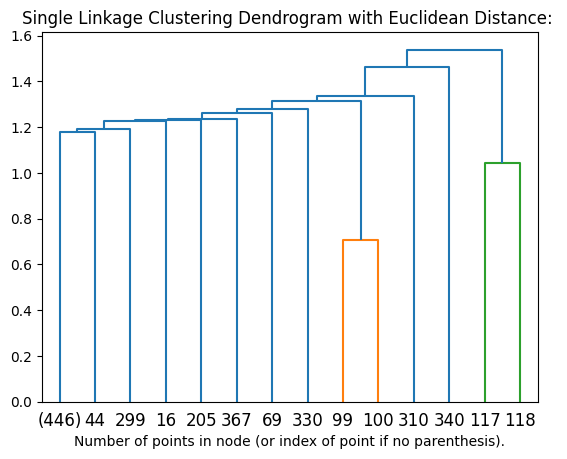

In [596]:
# 1.2 Agglomerative Approach (bottom-up)

# 1.2.1: improved single-linkage (choose best linkage and distance method)

from sklearn.cluster import AgglomerativeClustering

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_silhouette_avg = []

for metric in range_metric:
    AC_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='single')
    AC_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_silhouette_avg.append(silhouette_score(reduced_df, AC_grid.labels_))

optimal_metric=range_metric[np.argmax(AC_silhouette_avg)]
print("The optimal metric is: ",optimal_metric)
# find the best metric for SLC:

# plot dendrogram (reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


AC_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='single', compute_distances=True)
AC_final=AC_final.fit(reduced_df)

plt.title("Single Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
plot_dendrogram(AC_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


The optimal metric for average linkage is:  cosine


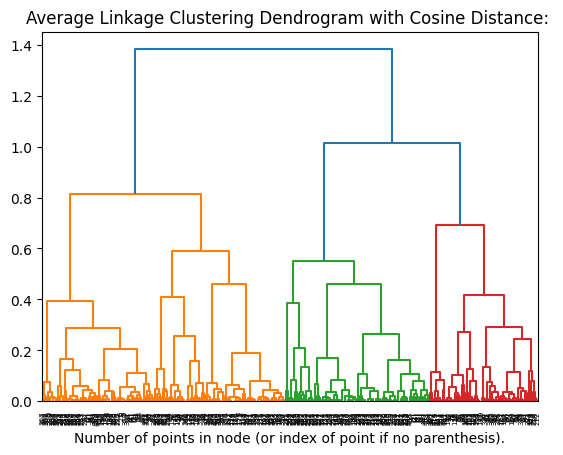

In [597]:
# 1.2 Agglomerative Approach (bottom-up)

# 1.2.2: average-linkage (choose best linkage and distance method)

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_avg_silhouette_avg = []

for metric in range_metric:
    AC_avg_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='average')
    AC_avg_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_avg_silhouette_avg.append(silhouette_score(reduced_df, AC_avg_grid.labels_))

optimal_metric=range_metric[np.argmax(AC_avg_silhouette_avg)]
print("The optimal metric for average linkage is: ",optimal_metric)

AC_avg_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='average', compute_distances=True)
AC_avg_final=AC_avg_final.fit(reduced_df)


plt.title("Average Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_avg_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The optimal metric for complete linkage is:  l1


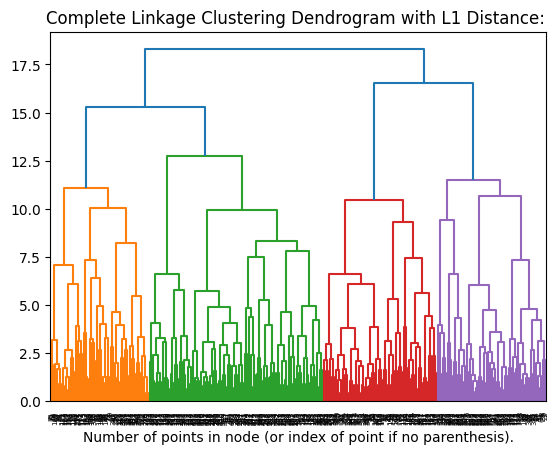

In [598]:
# 1.2 Agglomerative Approach (bottom-up)

# 1.2.3: average-linkage (choose best linkage and distance method)

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_com_silhouette_avg = []

for metric in range_metric:
    AC_com_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='complete')
    AC_com_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_com_silhouette_avg.append(silhouette_score(reduced_df, AC_com_grid.labels_))

optimal_metric=range_metric[np.argmax(AC_com_silhouette_avg)]
print("The optimal metric for complete linkage is: ",optimal_metric)

AC_com_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='complete', compute_distances=True)
AC_com_final=AC_com_final.fit(reduced_df)


plt.title("Complete Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_com_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

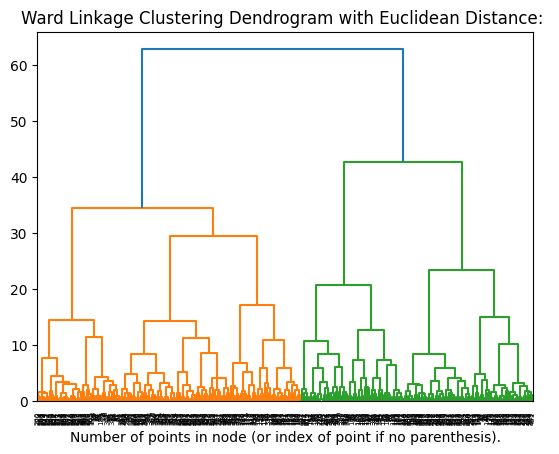

In [600]:
# 1.2 Agglomerative Approach (bottom-up)

# 1.2.4: Ward-linkage (choose best linkage and distance method)

# Silhouette Analysis:
# No need for Silhoutete analysis on metrics beause ward only accepts eucldiean distance

AC_ward = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward', compute_distances=True)
AC_ward=AC_ward.fit(reduced_df)


plt.title("Ward Linkage Clustering Dendrogram with Euclidean Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_ward, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

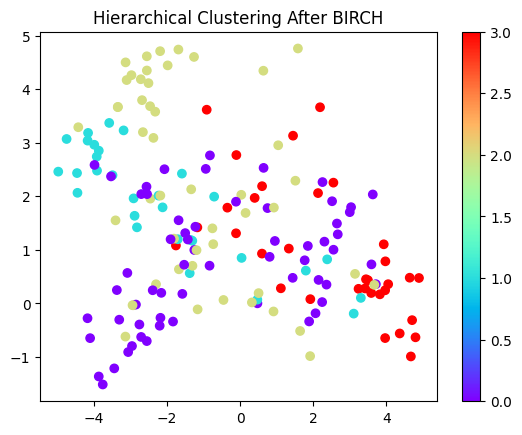

In [622]:
# BIRCH TEST (WORK)
from sklearn.cluster import Birch, AgglomerativeClustering

# Apply Birch Clustering
birch_model = Birch(threshold=0.5, n_clusters=4)
birch_model.fit(reduced_df)

# Use Subcluster Centers as Input for Hierarchical Clustering
subcluster_centers = birch_model.subcluster_centers_

# print(birch_model.labels_)
hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Adjust parameters as needed
hierarchical_cluster_labels = hierarchical_model.fit_predict(subcluster_centers)

# Visualize the Results (Optional)
plt.scatter(reduced_df[:, 0][:hierarchical_cluster_labels.shape[0]], reduced_df[:, 1][:hierarchical_cluster_labels.shape[0]], c=hierarchical_model.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering After BIRCH')
plt.colorbar()
plt.show()


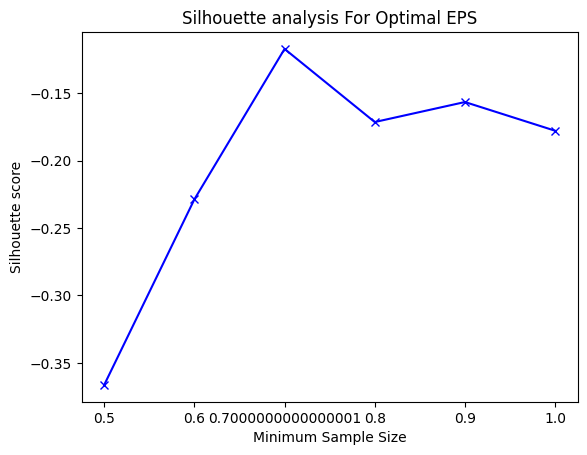

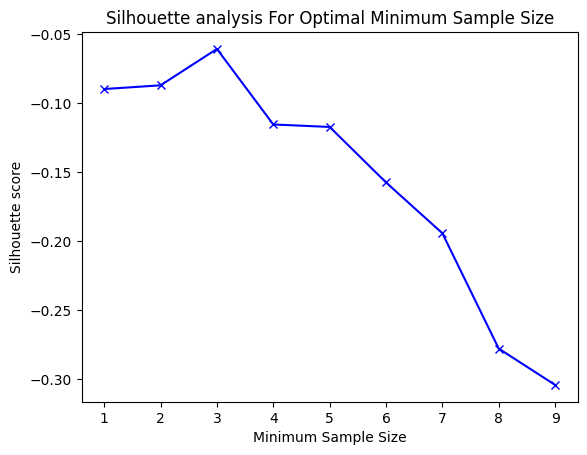

In [660]:
# DBSCAN

# Silhouette analysis
from sklearn.cluster import DBSCAN

AC_SSE_list=[]
DBS_grid_silhouette_avg=[]

# Define a range of epsilon values to explore
eps_values = np.linspace(0.1, 1.0, 10)
eps_list=[]
best_silhouette_score = -1
optimal_eps = None

# Iterate over epsilon values
for eps in eps_values:
    # Fit DBSCAN model with current epsilon
    dbscan_model = DBSCAN(eps=eps)
    cluster_labels = dbscan_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        DBS_grid_silhouette_avg.append(silhouette_avg)
        eps_list.append(eps)

        if silhouette_avg > best_silhouette_score:
            optimal_eps=eps
            best_silhouette_score=silhouette_avg

# plotting above
plt.plot(list(map(str, eps_list)),DBS_grid_silhouette_avg,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal EPS')
plt.show()

best_silhouette_score_sample = -1
optimal_sample = None

# finding minimum sample size 
range_min_samples=np.arange(1, 10)
DBS_grid_silhouette_avg_samples=[]
sample_list=[]

# Iterate over epsilon values
for sample in range_min_samples:
    # Fit DBSCAN model with current epsilon
    dbscan_model = DBSCAN(eps=optimal_eps, min_samples=sample)
    cluster_labels = dbscan_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        DBS_grid_silhouette_avg_samples.append(silhouette_avg)
        sample_list.append(sample)

        if silhouette_avg > best_silhouette_score_sample:
            optimal_sample=sample
            best_silhouette_score_sample=silhouette_avg

# print(optimal_sample)

# plotting above
plt.plot(list(map(str, sample_list)),DBS_grid_silhouette_avg_samples,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Minimum Sample Size')
plt.show()

# Acutal fitting after finding the optimal sample size and eps

dbscan_final_model = DBSCAN(eps=optimal_eps, min_samples=optimal_sample)
dbscan_final_cluster_labels = dbscan_final_model.fit_predict(reduced_df)


# plot it (TBA)    



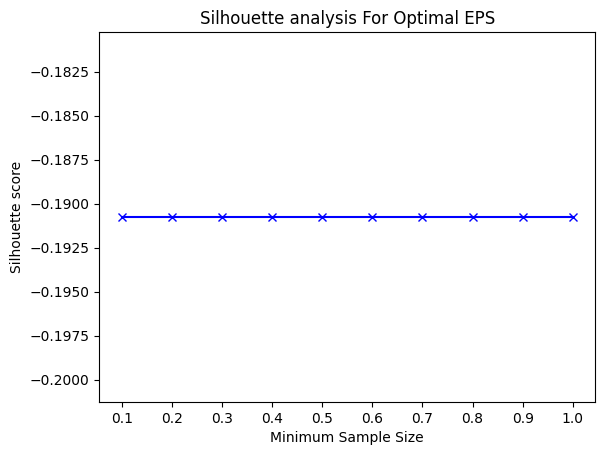

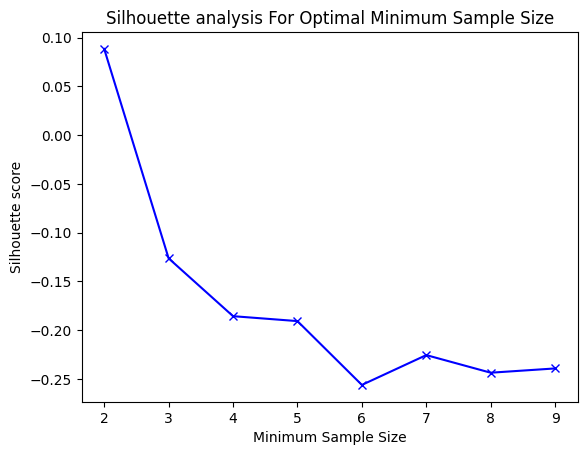

2
None
[  0   7   8  13   1  74  74  79  74 111  17  17  -1  -1 113  -1  -1  -1
  16   7  15  74  74  75  75  13  -1  14  -1  -1 108  14  15  15   2  86
 115  -1 109 113 113 112 114 115  -1 114 104  22 104  -1   9   0  16  15
   2  -1   2  -1  16  90  91  -1  99 101  97  99  99 103 104  -1 112  -1
 103 103  99  -1  99  99 103 103  95  99  -1  22   2  -1   3   0   9  21
   4  92  -1  95  -1  -1  93 111  -1 118 118  98 100 100 100 101  96  96
  96  99  97  -1  98 105  -1 105  97 119 119  -1  51  95  -1  90  -1  21
  89  52  26  -1  26  25  53  50  53  52  -1  25  -1  -1  27  -1  27  58
  58  -1 104 109 112  83  -1  83 114  -1  23  19  -1  23  22  -1  20  12
  76  18  -1  76  -1  11  -1  -1  78  76  -1  -1  80  -1  85  -1  80  79
  85  76  78  -1  76  17  18  -1  -1  13  -1  -1  -1  -1  -1  31  56  43
  37  37  31  43  -1  30  62  -1  -1  -1  -1  -1  -1 102  -1  53  -1  54
  56  -1  44  23  24  48  24  26  57  23  89  57  -1  49  -1  30  -1  59
  88  30  38  61  -1  46  -1  46  45  -1  -1

In [667]:
# OPTICS

# Silhouette analysis
from sklearn.cluster import OPTICS

OPTICS_grid_silhouette_avg=[]

# Define a range of epsilon values to explore
eps_values = np.linspace(0.1, 1.0, 10)
eps_list=[]
best_eps_silhouette_score = -1
optimal_eps = None

# Iterate over epsilon values
for eps in eps_values:
    # Fit DBSCAN model with current epsilon
    optic_eps_model = OPTICS(eps=eps)
    cluster_labels = optic_eps_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        OPTICS_grid_silhouette_avg.append(silhouette_avg)
        eps_list.append(round(eps,1))

        if silhouette_avg > best_silhouette_score:
            optimal_eps=eps
            best_eps_silhouette_score=silhouette_avg

# plotting above
plt.plot(list(map(str, eps_list)),OPTICS_grid_silhouette_avg,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal EPS')
plt.show()


# sample part
best_silhouette_score_sample = -1
optimal_sample = None

# finding minimum sample size 
range_min_samples=np.arange(1, 10)
OPTICS_grid_silhouette_avg_samples=[]
sample_list=[]

# Iterate over epsilon values
for sample in range_min_samples:
    # Fit DBSCAN model with current epsilon
    OPTICS_model = OPTICS(eps=optimal_eps, min_samples=sample)
    cluster_labels = OPTICS_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        OPTICS_grid_silhouette_avg_samples.append(silhouette_avg)
        sample_list.append(sample)

        if silhouette_avg > best_silhouette_score_sample:
            optimal_sample=sample
            best_silhouette_score_sample=silhouette_avg

# plotting above
plt.plot(list(map(str, sample_list)),OPTICS_grid_silhouette_avg_samples,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Minimum Sample Size')
plt.show()

# print(optimal_sample)
# print(optimal_eps)

# Acutal fitting after finding the optimal sample size and eps

OPTICS_final_model = OPTICS(eps=optimal_eps, min_samples=optimal_sample)
OPTICS_final_cluster_labels = OPTICS_final_model.fit_predict(reduced_df)

# print(OPTICS_final_cluster_labels)


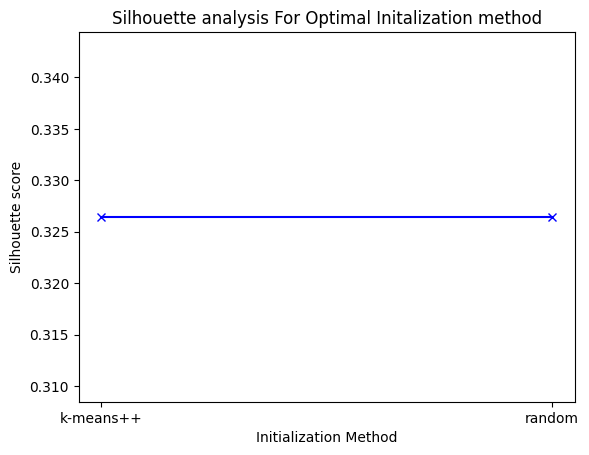

The optimal init method is:  k-means++


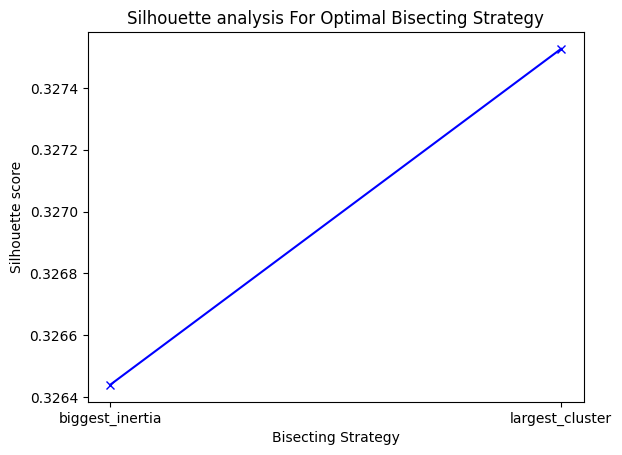

The optimal bisecting strategy is:  largest_cluster

The score for Bisecting 4-means clustering on regular data is:
-2274.3010907134494

The inertria for Bisecting 4-means clustering on regular data is:
2326.2897894022767


In [673]:
# Bisecting K-means

from sklearn.cluster import BisectingKMeans

# Silhouette Analysis:
range_init=['k-means++', 'random']

BK_SSE_list=[]
BK_silhouette_avg = []

for init in range_init:
    BKmeans = BisectingKMeans(n_clusters = 4, init=init)
    BKmeans.fit(reduced_df)
    # Append the metrics to lists
    BK_SSE_list.append(BKmeans.inertia_)
    BK_silhouette_avg.append(silhouette_score(reduced_df, BKmeans.labels_))

# plotting above
plt.plot(range_init,BK_silhouette_avg,'bx-')
plt.xlabel('Initialization Method') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Initalization method')
plt.show()

optimal_init=range_init[np.argmax(BK_silhouette_avg)]
print("The optimal init method is: ",optimal_init)

# finding the optimal bisecting strategy

range_bisect=['biggest_inertia', 'largest_cluster']
BK_SSE_list_2=[]
BK_silhouette_avg_2 = []

for bisect in range_bisect:
    BKmeans = BisectingKMeans(n_clusters = 4, bisecting_strategy=bisect)
    BKmeans.fit(reduced_df)
    # Append the metrics to lists
    BK_SSE_list_2.append(BKmeans.inertia_)
    BK_silhouette_avg_2.append(silhouette_score(reduced_df, BKmeans.labels_))

# plotting above
plt.plot(range_bisect,BK_silhouette_avg_2,'bx-')
plt.xlabel('Bisecting Strategy') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Bisecting Strategy')
plt.show()

optimal_bisect=range_bisect[np.argmax(BK_silhouette_avg_2)]
print("The optimal bisecting strategy is: ",optimal_bisect)


# fitting on the optimal batch size
BKmeans_best=BisectingKMeans(n_clusters=4, bisecting_strategy=optimal_bisect, init=optimal_init)

# fit the k-means model (fit OR fit_predict)
BKmeans_best.fit_predict(reduced_df)

# Get the score
print("\nThe score for Bisecting 4-means clustering on regular data is:")
print(BKmeans_best.score(reduced_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for Bisecting 4-means clustering on regular data is:")
print(BKmeans_best.inertia_) # returned 12615.62441662376

# # Note which cluster each observation is in
# print("\nThe labels for mini-batch 4-means clustering on regular data is:")
# print(MBKmeans_best.labels_) # returned an array that shows which cluster each observation is in


In [676]:
# FCM

import skfuzzy as fuzz

# Silhoutete (TBA)

# Set hyperparameters
num_clusters = 4
fuzziness_parameter = 2.0
max_iterations = 100
tolerance = 1e-4

# Initialize cluster centers
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(reduced_df, num_clusters, fuzziness_parameter, error=tolerance, maxiter=max_iterations, init=None)

print(cntr)

# 'cntr' contains the final cluster centers
# 'u' contains the membership values









[[-6.31156968e-01  4.15443131e-01  3.14532944e-02 ...  7.63935699e-01
  -2.12428548e+00 -1.76828319e+00]
 [ 1.01833593e-03  1.16564674e+00  9.29725588e-01 ... -2.85385396e+00
  -3.44538238e+00 -3.55412625e+00]
 [-6.31156404e-01  4.15443724e-01  3.14539972e-02 ...  7.63932787e-01
  -2.12428636e+00 -1.76828440e+00]
 [ 4.74552794e-01  9.52198171e-01  5.98436117e-01 ... -2.34711288e+00
  -1.34202340e+00 -1.03579551e+00]]
